In [51]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')

In [52]:
#testing assumptions
import random
#hm= how many data points variance= , step= how much will y value be stepped up per point, correlation means positive slope or negative slope or none
#false correlation means positive number and step +ve
#true correlation means negative number and step -ve
def create_dataset(hm, variance,step=2 , correlation =False):
        val=1 #first value for 1
        ys=[]
        for i in range(hm):
                y=val+random.randrange(-variance,variance)
                ys.append(y)
                if correlation and correlation=='pos':
                        val+=step
                elif correlation and correlation=='neg':
                        val-=step
        xs=[i for i in range(len(ys))]
        return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


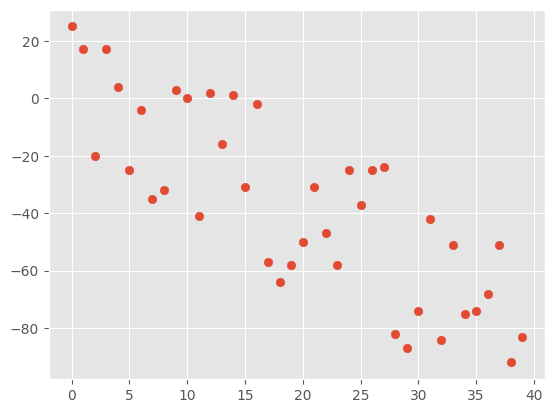

In [53]:
# xs=np.array([1,2,3,4,5,6], dtype=np.float64)
# ys=np.array([5,4,6,5,6,7], dtype=np.float64)
# plt.scatter(xs, ys)
# plt.show()
hm=40
variance=30
step=2
xs, ys= create_dataset(hm, variance, step , correlation='neg')
plt.scatter(xs, ys)
plt.show()

In [54]:
# def best_fit_line(xs, ys):
#         m=( ((mean(xs)* mean(ys))-mean(xs*ys)) /(mean(xs) **2-mean(xs**2)))
#         return m

# m=best_fit_line(xs, ys)
# print(m)

# x=np.linspace(1.0,6.0, 100)#third parameter is the number of points 
# y=m*x
# plt.plot(x,y)
# plt.show()

-2.2326454033771106


In [55]:
# def intercept(sx, ys):
#         b=mean(ys)-m*mean(xs)
#         return b

# b=intercept(xs,ys)
# print(b)

6.636585365853655


In [56]:
#alternate m and b calculations
def best_fit_line(xs, ys):
        m=((hm* sum(xs*ys)-(sum(xs)*sum(ys)))/(hm*sum(xs**2)-(sum(xs))**2))
        return m

def intercept(sx, ys):
         c=(((sum(xs**2)*sum(ys))-(sum(xs)*sum(xs*ys)))/(hm*sum(xs**2)-(sum(xs)**2)))
         return c
m1=best_fit_line(xs, ys)
b1=intercept(xs,ys)
print(m1)
print(b1)

-2.2326454033771106
6.636585365853659


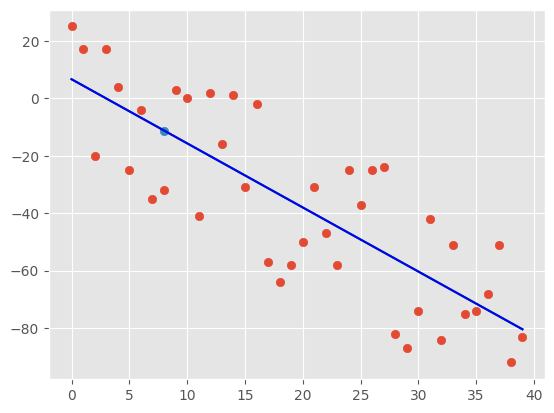

In [57]:
regression_line=[(m*x)+b for x in xs]
# regression_line_1=[(m1*x)+b1 for x in xs]
regression_line=np.asarray(regression_line)
# regression_line_1=np.asarray(regression_line)

predict_x=8
predict_y=m*predict_x+b
# for x in xs:
#         regression_line.append((m*x)+b)
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.plot(xs, regression_line, color='g')
# plt.show()
# plt.plot(xs, regression_line_1, color='b')
plt.show()

In [58]:
#r squared theory
def squared_error(ys_original, ys_line):
        # print(type(ys_original), type(ys_line))
        return sum((ys_line-ys_original)**2)

def coefficient_of_determination(ys_orig, ys_line):
        y_mean_line=[mean(ys_orig) for y in ys_orig] # this thing returns a generator and so it should be placed in square brackets 
        # y_mean_line=np.asarray(y_mean_line)
        # y_mean_line=np.asarray(ys_orig)
        # y_mean_line=np.asarray(ys_line)
        # # print(type(ys_line))
        squared_error_regr=squared_error(ys_orig, ys_line)
        squared_error_y_mean=squared_error(ys_orig, y_mean_line)
        return 1-(squared_error_regr/squared_error_y_mean)

r_squared=coefficient_of_determination(ys, regression_line)
# r_squared_1=coefficient_of_determination(ys, regression_line_1)

print(r_squared)
# print(r_squared_1)
# print(type(regression_line))

0.6517057737072482
0.6517057737072482


In [59]:
# xs, ys= create_dataset(40, 40, 2 , correlation='pos')
# plt.scatter(xs, ys)
# plt.show()

all _1 are for comparison purposes